In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline
import matplotlib.pyplot as plt
import os

In [2]:
#import
train_df = pd.read_csv("../Resources/2012to2016_train.csv")
test_df = pd.read_csv("../Resources/2018_test.csv")

In [ ]:
# train_df drop ciggeret smoking prevelancce

In [3]:
test_df

,Unnamed: 0,Year,Location,CigaretteSmokingPrevalence,TobaccoSmokingPrevalence,TobaccoUsePrevalance
0,0,2018,Albania,43.3,50.5,50.5
1,1,2018,Algeria,11.1,14.5,18.8
2,2,2018,Andorra,27.7,33.8,33.8
3,3,2018,Austria,27.0,29.1,29.1
4,4,2018,Belgium,23.4,25.0,25.0
...,...,...,...,...,...,...
103,103,2018,Saudi Arabia,18.6,12.7,2.0
104,104,2018,Serbia,36.2,40.6,40.6
105,105,2018,Seychelles,31.0,35.3,35.3
106,106,2018,Sierra Leone,29.1,31.0,31.0


In [4]:
test_df = test_df.drop('Unnamed: 0', axis = 1)

In [5]:
test_df

,Year,Location,CigaretteSmokingPrevalence,TobaccoSmokingPrevalence,TobaccoUsePrevalance
0,2018,Albania,43.3,50.5,50.5
1,2018,Algeria,11.1,14.5,18.8
2,2018,Andorra,27.7,33.8,33.8
3,2018,Austria,27.0,29.1,29.1
4,2018,Belgium,23.4,25.0,25.0
...,...,...,...,...,...
103,2018,Saudi Arabia,18.6,12.7,2.0
104,2018,Serbia,36.2,40.6,40.6
105,2018,Seychelles,31.0,35.3,35.3
106,2018,Sierra Leone,29.1,31.0,31.0


In [6]:
train_df.loc[:, "CigaretteSmokingPrevalence"] = train_df.loc[:, "CigaretteSmokingPrevalence"].astype("int")
train_df.loc[:, "TobaccoSmokingPrevalence"] = train_df.loc[:, "TobaccoSmokingPrevalence"].astype("int")
train_df.loc[:, "TobaccoUsePrevalance"] = train_df.loc[:, "TobaccoUsePrevalance"].astype("int")

In [7]:
test_df.loc[:, "CigaretteSmokingPrevalence"] = test_df.loc[:, "CigaretteSmokingPrevalence"].astype("int")
test_df.loc[:, "TobaccoSmokingPrevalence"] = test_df.loc[:, "TobaccoSmokingPrevalence"].astype("int")
test_df.loc[:, "TobaccoUsePrevalance"] = test_df.loc[:, "TobaccoUsePrevalance"].astype("int")

In [8]:
X_train= train_df[["TobaccoSmokingPrevalence", "TobaccoUsePrevalance", "Location"]]
y_train = train_df["CigaretteSmokingPrevalence"]

print("Shape: ", X_train.shape, y_train.shape)

Shape:  (582, 3) (582,)


In [9]:
X_train= pd.get_dummies(X_train)


In [10]:
X_test = test_df[["TobaccoSmokingPrevalence", "TobaccoUsePrevalance", "Location"]]
y_test = test_df["CigaretteSmokingPrevalence"]

In [11]:
X_test= pd.get_dummies(X_test)

In [12]:
X_train.shape,X_test.shape

((582, 122), (108, 110))

In [13]:
missing_columns = []
for c in X_train.columns:
    if c not in X_test.columns:
        X_test[c] = 0
        missing_columns.append(c)
print(len(X_train.columns), len(X_test.columns))
print(missing_columns)

122 124
['Location_Botswana', 'Location_Burundi', 'Location_Cameroon', 'Location_Eritrea', 'Location_Eswatini', 'Location_Ethiopia', 'Location_Kenya', 'Location_Lesotho', 'Location_Liberia', 'Location_Myanmar', 'Location_Nepal', 'Location_Nigeria', 'Location_Timor-Leste', 'Location_United States of America']


In [14]:
missing_columns = []
for c in X_test.columns:
    if c not in X_train.columns:
        X_train[c] = 0
        missing_columns.append(c)
print(len(X_train.columns), len(X_test.columns))
print(missing_columns)

124 124
['Location_Belarus', 'Location_Sao Tome and Principe']


In [15]:
print(X_train)

     TobaccoSmokingPrevalence  TobaccoUsePrevalance  Location_Albania  \
0                          51                    51                 1   
1                          14                    19                 0   
2                          33                    33                 0   
3                          30                    30                 0   
4                          25                    25                 0   
..                        ...                   ...               ...   
577                         2                     3                 0   
578                        43                    43                 0   
579                        38                    39                 0   
580                        28                    28                 0   
581                        27                    27                 0   

     Location_Algeria  Location_Andorra  Location_Argentina  Location_Armenia  \
0                   0                 0   

In [26]:
X_test.to_csv("complete_xtest.csv", index=False)

In [16]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [17]:
classifier.fit(X_train, y_train)

/Users/nikolajankovic/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.4381443298969072
Testing Data Score: 0.08333333333333333


In [19]:
from sklearn.ensemble import RandomForestClassifier
ran_for = RandomForestClassifier(random_state=1)
ran_for.fit(X_train, y_train)
print(f"Training Data Score: {ran_for.score(X_train, y_train)}")
print(f"Testing Data Score: {ran_for.score(X_test, y_test)}")

Training Data Score: 0.936426116838488
Testing Data Score: 0.21296296296296297


In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
log_reg = LogisticRegression(solver= "lbfgs", random_state=1)
log_reg.fit(X_train_scaled, y_train)
print(f"Training Data Score: {log_reg.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {log_reg.score(X_test_scaled, y_test)}")

Training Data Score: 0.5446735395189003
Testing Data Score: 0.06481481481481481


/Users/nikolajankovic/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
ran_for = RandomForestClassifier(random_state=1, n_estimators=500)
ran_for.fit(X_train_scaled, y_train)
print(f"Training Data Score: {ran_for.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {ran_for.score(X_test_scaled, y_test)}")

Training Data Score: 0.936426116838488
Testing Data Score: 0.23148148148148148


In [23]:
feature_importances = ran_for.feature_importances_

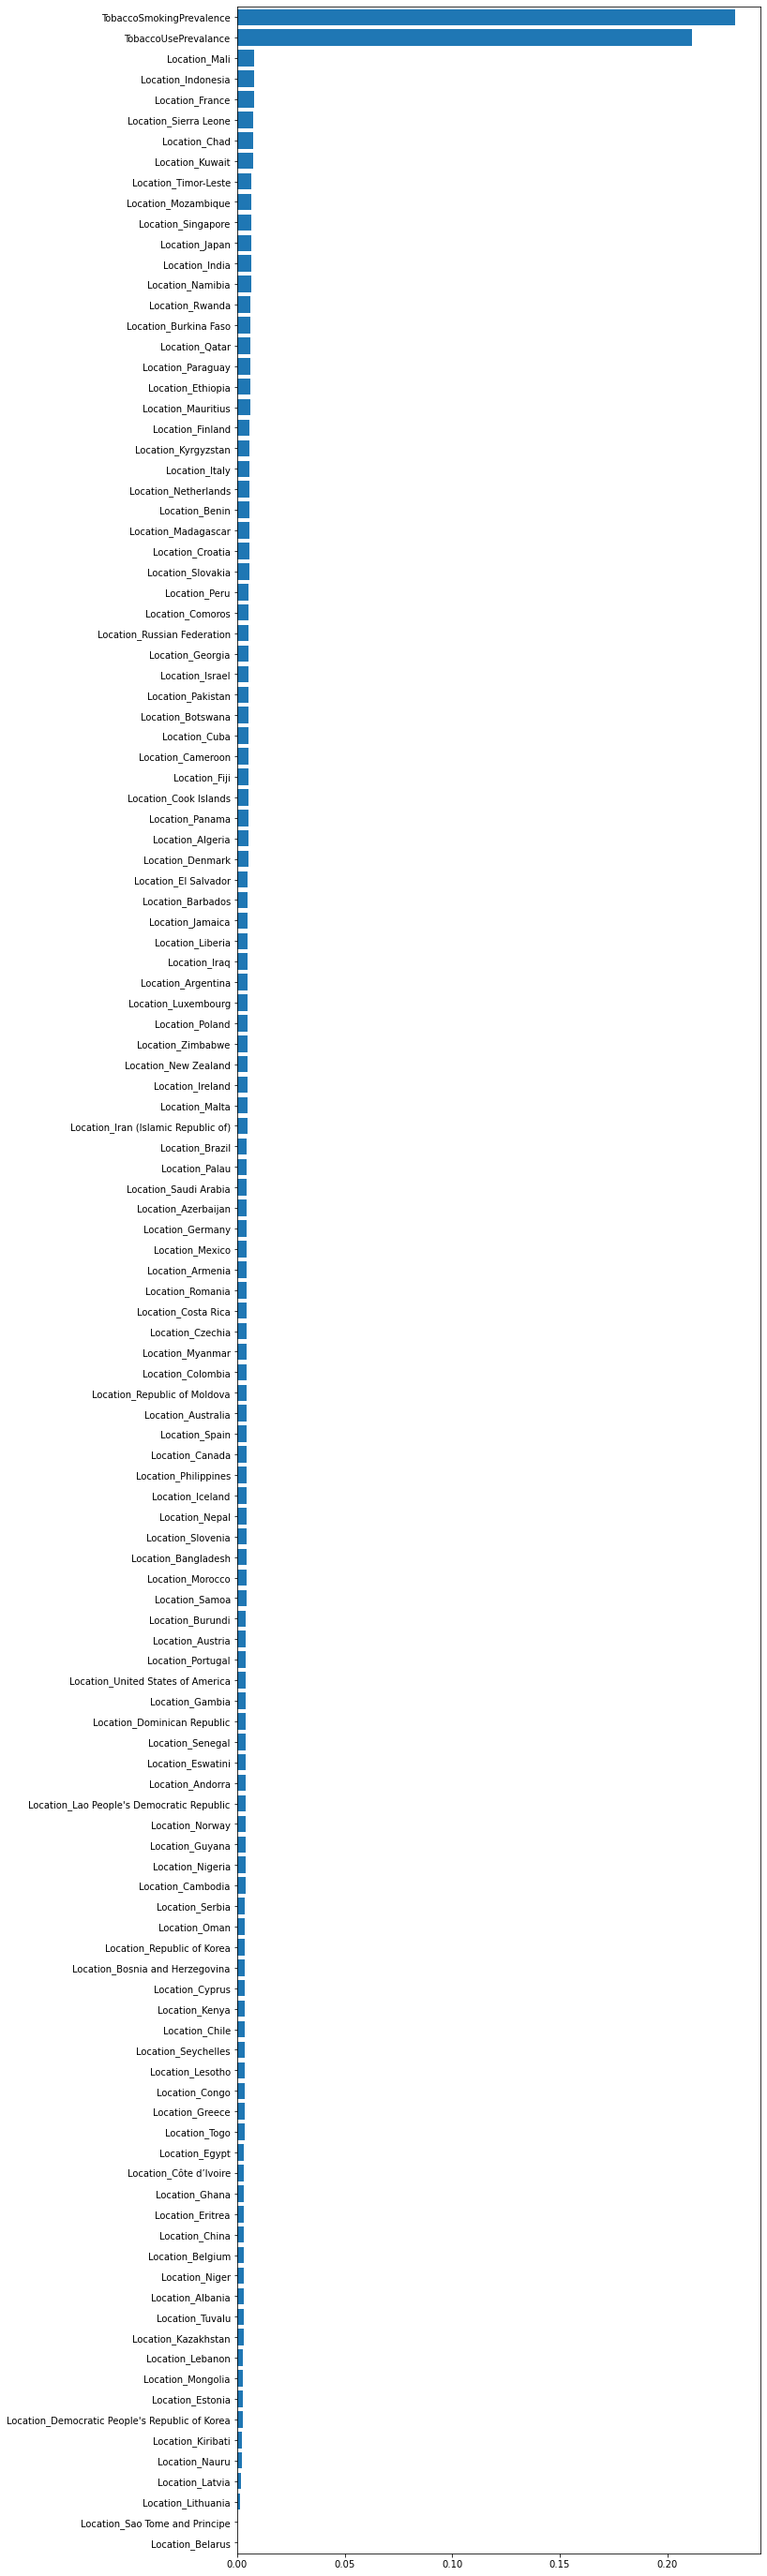

In [25]:
features = sorted(zip(X_train.columns, ran_for.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,50)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [24]:
import pickle

In [25]:
pickle.dump(ran_for, open("model.pkl", "wb"))